<a href="https://colab.research.google.com/github/ShashikanthKungulwar/cryptocurrency-volatility/blob/main/model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ShashikanthKungulwar/cryptocurrency-volatility/refs/heads/main/dataset.csv")

In [3]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [4]:
df.isna().sum()

,0
Unnamed: 0,0
open,0
high,0
low,0
close,0
volume,0
marketCap,0
timestamp,0
crypto_name,0
date,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


In [6]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [7]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         72946 non-null  float64
 1   high         72946 non-null  float64
 2   low          72946 non-null  float64
 3   close        72946 non-null  float64
 4   volume       72946 non-null  float64
 5   marketCap    72946 non-null  float64
 6   timestamp    72946 non-null  object 
 7   crypto_name  72946 non-null  object 
 8   date         72946 non-null  object 
dtypes: float64(6), object(3)
memory usage: 5.0+ MB


In [9]:
df["date"] = pd.to_datetime(df["date"])

In [10]:
df = df.sort_values(["crypto_name", "date"])

In [11]:
df["log_return"] = df.groupby("crypto_name")["close"].transform(
    lambda x: np.log(x / x.shift(1))
)

In [12]:
df["volatility_7"] = df.groupby("crypto_name")["log_return"].transform(
    lambda x: x.rolling(7).std()
)

# 3️⃣ Future volatility target
df["target"] = df.groupby("crypto_name")["volatility_7"].shift(-1)

# 4️⃣ Drop NaN
df = df.dropna()
df.drop(["date","timestamp"],inplace = True,axis =1)

In [13]:
df.head()

,open,high,low,close,volume,marketCap,crypto_name,log_return,volatility_7,target
45010,43.764463,47.569533,43.291776,46.817744,8.155377e+05,2.356322e+08,Aave,0.067440,1.762418,0.107001
45028,46.818146,51.405655,46.703328,49.133718,1.074627e+06,2.472884e+08,Aave,0.048283,0.107001,0.107327
45120,49.133130,51.453374,48.716040,49.660726,6.921506e+05,2.499408e+08,Aave,0.010669,0.107327,0.109557
45155,49.661573,54.421418,48.754077,52.238692,1.354836e+06,2.629157e+08,Aave,0.050609,0.109557,0.051472
45191,52.238392,57.481904,49.598735,51.124317,1.386221e+06,2.573071e+08,Aave,-0.021563,0.051472,0.038799


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72505 entries, 45010 to 72859
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          72505 non-null  float64
 1   high          72505 non-null  float64
 2   low           72505 non-null  float64
 3   close         72505 non-null  float64
 4   volume        72505 non-null  float64
 5   marketCap     72505 non-null  float64
 6   crypto_name   72505 non-null  object 
 7   log_return    72505 non-null  float64
 8   volatility_7  72505 non-null  float64
 9   target        72505 non-null  float64
dtypes: float64(9), object(1)
memory usage: 6.1+ MB


In [15]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'crypto_name',
       'log_return', 'volatility_7', 'target'],
      dtype='object')

In [16]:
cat_cols = list(df.select_dtypes(exclude = "number").columns)
num_cols = list(df.select_dtypes(include = "number").columns)

In [17]:
cat_cols,num_cols

(['crypto_name'],
 ['open',
  'high',
  'low',
  'close',
  'volume',
  'marketCap',
  'log_return',
  'volatility_7',
  'target'])

In [18]:
for i in cat_cols:
  print(i," colums has : ",len(df[i].unique()))

crypto_name  colums has :  55


In [19]:
cat_cols

['crypto_name']

In [20]:
#so using lable encoder and using tree model so that label enoding dont have effect on model

In [21]:
from sklearn.preprocessing import  LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
X = df.drop("target",axis = 1)
y = df["target"]

sc = StandardScaler()
le = LabelEncoder()
# le.fit_transform(X,cat_cols)
for i in cat_cols:
  X[i] = le.fit_transform(X[i])
ct = ColumnTransformer([("sc",sc,num_cols)],remainder = "passthrough")

In [22]:
X.head()

,open,high,low,close,volume,marketCap,crypto_name,log_return,volatility_7
45010,43.764463,47.569533,43.291776,46.817744,8.155377e+05,2.356322e+08,0,0.067440,1.762418
45028,46.818146,51.405655,46.703328,49.133718,1.074627e+06,2.472884e+08,0,0.048283,0.107001
45120,49.133130,51.453374,48.716040,49.660726,6.921506e+05,2.499408e+08,0,0.010669,0.107327
45155,49.661573,54.421418,48.754077,52.238692,1.354836e+06,2.629157e+08,0,0.050609,0.109557
45191,52.238392,57.481904,49.598735,51.124317,1.386221e+06,2.573071e+08,0,-0.021563,0.051472


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,shuffle = False)

In [80]:
x_train.shape,y_train.shape

((58004, 9), (58004,))

In [50]:
num_cols.remove("target")

ValueError: list.remove(x): x not in list

In [81]:
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [82]:
X.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'crypto_name',
       'log_return', 'volatility_7'],
      dtype='object')

In [83]:
!pip install xgboost

In [84]:
from xgboost import XGBRegressor

In [85]:
model  = XGBRegressor()

In [86]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [87]:
y_pred = model.predict(x_test)

In [88]:
model.score(x_test,y_test)

0.6917364291937607

In [89]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [90]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))


0.013584611687159883
0.0005819457814253571
0.6917364291937607


In [91]:
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(sklearn.base.RegressorMixin, XGBModel)
 |  XGBRegressor(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror', **kwargs: Any) -> None
 |
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |
 |  Parameters
 |  ----------
 |
 |      n_estimators : typing.Optional[int]
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |
 |      max_depth :  typing.Optional[int]
 |
 |          Maximum tree depth for base learners.
 |
 |      max_leaves : typing.Optional[int]
 |
 |          Maximum number of leaves; 0 indicates no limit.
 |
 |      max_bin : typing.Optional[int]
 |
 |          If using histogram-based algorithm, maximum number of bins per feature
 |
 |      grow_policy : typing.Optional[str]
 |
 |  

In [92]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)

In [109]:
from sklearn.model_selection import RandomizedSearchCV
rm = RandomizedSearchCV(
    estimator = XGBRegressor(scoring="neg_mean_absolute_error"),
    param_distributions = {
        "max_depth" : [3,4,5,6,7,8],
        "n_estimators" : [100,200,300,400,500,600,700,800],
        'learning_rate': np.linspace(0.01, 0.2, 10),
        'subsample': np.linspace(0.6, 1.0, 5)
    },
    cv=tss,
    verbose = 3,
    random_state = 42,
    n_jobs=1
)

In [110]:
rm.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.07333333333333333, max_depth=6, n_estimators=500, subsample=0.6;, score=0.796 total time=   7.7s
[CV 2/5] END learning_rate=0.07333333333333333, max_depth=6, n_estimators=500, subsample=0.6;, score=0.704 total time=   2.0s
[CV 3/5] END learning_rate=0.07333333333333333, max_depth=6, n_estimators=500, subsample=0.6;, score=0.801 total time=   2.2s
[CV 4/5] END learning_rate=0.07333333333333333, max_depth=6, n_estimators=500, subsample=0.6;, score=0.787 total time=   3.7s
[CV 5/5] END learning_rate=0.07333333333333333, max_depth=6, n_estimators=500, subsample=0.6;, score=0.333 total time=   7.1s
[CV 1/5] END learning_rate=0.11555555555555555, max_depth=5, n_estimators=300, subsample=1.0;, score=0.634 total time=   0.6s
[CV 2/5] END learning_rate=0.11555555555555555, max_depth=5, n_estimators=300, subsample=1.0;, score=0.658 total time=   0.7s
[CV 3/5] END learning_rate=0.11555555555555555, max_depth

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamm...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=1,
                   param_distributions={'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800],
                                        'subsample': array([0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, verbose=3)

In [111]:
rm.best_score_

np.float64(0.7255392438819016)

In [112]:
rm.best_params_

{'subsample': np.float64(0.8),
 'n_estimators': 100,
 'max_depth': 4,
 'learning_rate': np.float64(0.1366666666666667)}

In [113]:
m = rm.best_estimator_

In [114]:
y_pred = m.predict(x_test)

In [115]:
r2_score(y_test,y_pred)

0.7370322585984641

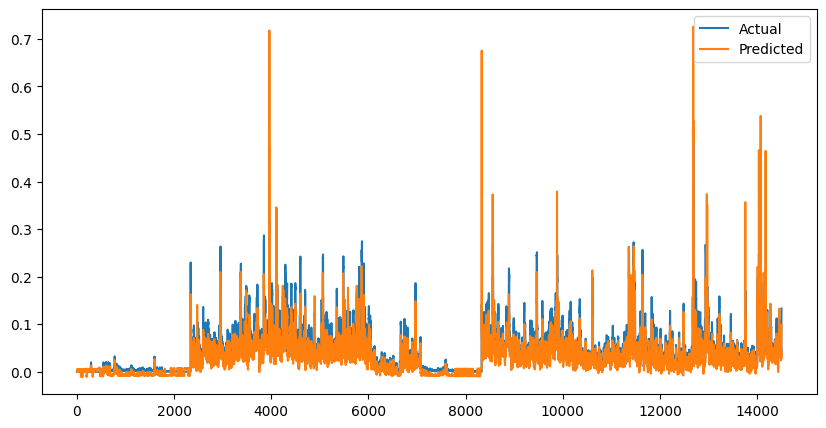

In [116]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(m.predict(x_test), label="Predicted")
plt.legend()
plt.show()